# Washington Shelf Experiment Data

In this exercise we will study data from the Washington Shelf experiment. The data contains transmission signals among other background noise. We will:

* fit a distribution to the background noise
* fit a distribution to the transmission signal
* use the fitted distributions to set up a statistical test to predict presence of a transmission sound and test on new samples

## Reading Data

To construct "idealized" distributions for transmission and background, we have extracted short segments of length 1 sec corresponding to the transmission, and 1 sec of background sound before it. The sampling frequency is 48kHz. We have stored the time series in two `.csv` files: `df_tr.csv` and `df_bg.csv`. The column names correspond to the signal timestamps.



In [5]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
import scipy as sp

In [6]:
fs = 48000

In [7]:
# reading transmission dataset
df_tr = pd.read_csv("df_tr.csv")
# reading background dataset
df_bg = pd.read_csv("df_bg.csv")

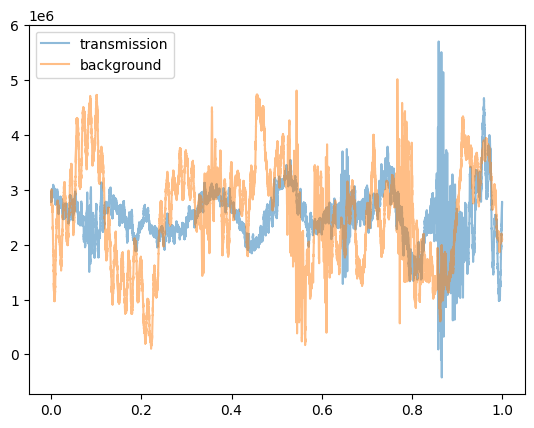

In [20]:
# display 1 pair of transmission and background time series
time = np.arange(0, 1, 1. / fs)


plt.plot(time, df_tr.iloc[:,40], label="transmission", alpha=0.5)
plt.plot(time, df_bg.iloc[:,40], label="background", alpha=0.5)
plt.legend()

In [11]:
df_tr.head()

,220730142130,220730142430,220730142730,220730143030,220730143330,220730143631,220730143931,220730144230,220730144531,220730144830,...,220731145126,220731145426,220731145727,220731150027,220731150327,220731150626,220731150926,220731151226,220731151456,220731151827
0,1.972855e+06,2.490424e+06,3.062796e+06,5.839406e+06,3.026262e+06,2.210328e+06,3.154132e+06,4.572882e+06,304452.867885,1.022962e+06,...,2.228595e+06,2.149437e+06,5.315747e+06,-718508.768208,3.805661e+06,4.609416e+06,298363.810527,2.259040e+06,2.691363e+06,5.193966e+06
1,1.924142e+06,2.545226e+06,3.050618e+06,6.082968e+06,3.020172e+06,2.246862e+06,3.117597e+06,4.511992e+06,340987.212031,9.925163e+05,...,2.173793e+06,1.985033e+06,5.053918e+06,-694152.538777,3.817839e+06,4.609416e+06,213117.007519,2.240773e+06,2.733987e+06,5.230500e+06
2,1.918053e+06,2.551315e+06,3.026262e+06,6.302174e+06,3.007994e+06,2.307753e+06,3.141954e+06,4.493724e+06,359254.384104,9.133586e+05,...,2.167704e+06,1.838895e+06,4.761643e+06,-675885.366704,3.848284e+06,4.603327e+06,146137.376585,2.271218e+06,2.746165e+06,5.285302e+06
3,1.942409e+06,2.472157e+06,3.026262e+06,6.527469e+06,3.032351e+06,2.307753e+06,3.123686e+06,4.511992e+06,407966.842965,8.646461e+05,...,2.228595e+06,1.668402e+06,4.438923e+06,-657618.194631,3.890908e+06,4.633773e+06,103513.975081,2.313842e+06,2.740076e+06,5.321836e+06
4,1.936320e+06,2.496514e+06,2.983638e+06,6.704052e+06,3.050618e+06,2.289486e+06,3.135865e+06,4.511992e+06,511480.818046,8.524680e+05,...,2.289486e+06,1.479641e+06,4.073579e+06,-694152.538777,3.945709e+06,4.664218e+06,158315.491300,2.338198e+06,2.764432e+06,5.346192e+06


## Filtering Data

Since the data is quite noisy, and sometimes the transmission is not visible. We will use a filter to limit the frequency content to (3450Hz, 3550Hz) range. 

In [12]:
import scipy as sp

In [21]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = sp.signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = sp.signal.sosfilt(sos,inputSignal)
    
    return outputSignal

In [22]:
flimits = [3450, 3550]
signal_tr_filt = BandPass( df_tr.iloc[:,40], flimits, fs)
signal_bg_filt = BandPass( df_bg.iloc[:,40], flimits, fs)

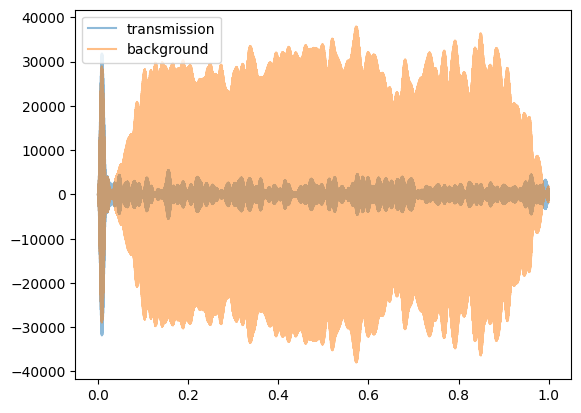

In [23]:
plt.plot(time, signal_tr_filt, alpha=0.5, label = "transmission")
plt.plot(time,signal_bg_filt, alpha=0.5, label = "background")
plt.legend()
plt.show()

### TODO: Filter all the data

## Computing RMS

Compute the Root Mean Square for each 1 sec signal, and convert to dB.

In [17]:
# RMS in dB for one example
rms_tr = 20*np.log10(np.sqrt(np.mean(np.square(signal_tr_filt.astype('float')))))
print(rms_tr)

rms_bg = 20*np.log10(np.sqrt(np.mean(np.square(signal_bg_filt.astype('float')))))
print(rms_bg)

68.80727048238131
80.69444141871361


**TODO:** Compute RMS and convert to dB for each 1 sec signal.

In [27]:
bg_all, tr_all = [], []

for col in df_bg:

    bg_ch4_filt = BandPass(df_bg[col], flimits, fs)
    bg_all.append(np.sqrt(np.mean(np.square(bg_ch4_filt.astype('float')))))


for col in df_tr:

    tr_ch4_filt = BandPass(df_tr[col], flimits, fs)
    tr_all.append(np.sqrt(np.mean(np.square(tr_ch4_filt.astype('float')))))

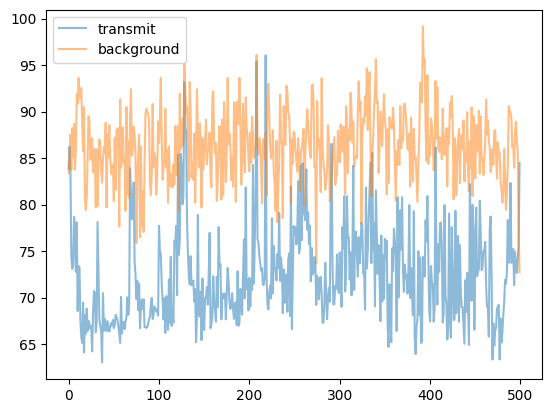

In [28]:
plt.plot(20*np.log10(tr_all), alpha=0.5, label="transmit")
plt.plot(20*np.log10(bg_all), alpha=0.5, label="background")
plt.legend()
plt.show()

**TODO:** Plot the histograms of the RMS dB values for the transmission and background signals. What type of distribution do they follow?

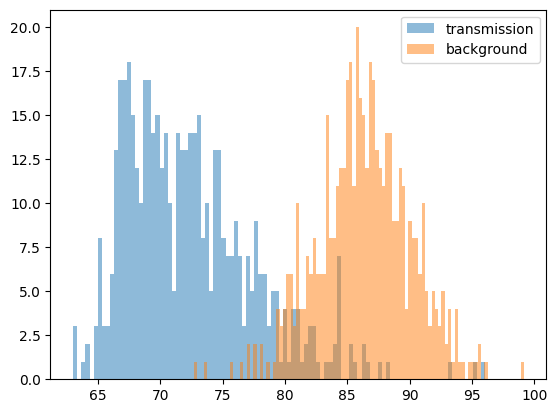

In [29]:
_ = plt.hist(20*np.log10(tr_all), bins=100, alpha=0.5, label="transmission")
_ = plt.hist(20*np.log10(bg_all), bins=100, alpha=0.5, label="background")
plt.legend()

## Fitting Distributions

In [40]:
from scipy import stats

In [41]:
def plot_skewnorm_density_L(a, scale, loc):
  h = plt.hist(X, bins=100, density=True, alpha=0.5)

  # evaluate the function at the histogram bins
  skewnorm_density = stats.skewnorm.pdf(h[1], a=a, scale=scale, loc=loc)

  # evaluation the function at the observations
  skewnorm_likelihood = stats.skewnorm.pdf(X, a=a, scale=scale, loc=loc)
  L = np.sum(np.log(skewnorm_likelihood))

  plt.plot(h[1], skewnorm_density)
  plt.title(f"Log-Likelihood {L:.10f}")

In [42]:
from ipywidgets import interact
import ipywidgets as widgets

TODO: Select starting values for the widget.

In [43]:
shape = 
scale = 
loc = 

SyntaxError: invalid syntax (2252643216.py, line 1)

In [56]:
# X = 20*np.log10(tr_all)
X = 20*np.log10(bg_all)

In [57]:
shape = 0
loc = np.mean(X)
scale = np.std(X)

In [ ]:
shape_slider = widgets.FloatSlider(
    value=shape,
    min=shape-10,
    max=shape+10,
    step=0.01,
    description='Shape:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

scale_slider = widgets.FloatSlider(
    value=scale,
    min=scale-10,
    max=scale+10,
    step=0.01,
    description='Scale:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

loc_slider = widgets.FloatSlider(
    value=loc,
    min=loc-10,
    max=loc+10,
    step=0.01,
    description='Location:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


**TODO** Select parameters to fit the distribution.

In [ ]:
out = interact(plot_skewnorm_density_L, a = shape_slider, scale = scale_slider, loc = loc_slider)

interactive(children=(FloatSlider(value=0.0, description='Shape:', max=10.0, min=-10.0, step=0.01), FloatSlide…